In [22]:
import os
import cv2
from face_detector import FaceDetector
from descriptor_calculator.descriptorcalculator import DescriptorCalculator
from sklearn.manifold import TSNE
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
dc = DescriptorCalculator()
face_rect_detector = FaceDetector()

def get_descriptors(video_path):
    video_capture = cv2.VideoCapture(video_path)
    ret = True
    descriptors = []
    while ret:
        ret, frame = video_capture.read()
        if ret:
            rects = face_rect_detector(frame)
            for rect in rects:
                descriptors.append(dc.calculate(frame, rect))
    video_capture.release()
    return descriptors
            

W0124 11:58:59.560040 140085523605312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0124 11:58:59.573263 140085523605312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0124 11:58:59.579074 140085523605312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0124 11:58:59.616196 140085523605312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0124 11:58:59.839262 140085523605312 deprecation_wrapp

In [10]:
video_dir = 'video'
descriptors = []
for video_path in os.listdir(video_dir):
    print(video_path)
    video_path = os.path.join(video_dir, video_path)
    descriptors.extend(get_descriptors(video_path))

4p-c0.avi
passageway1-c3.avi
6p-c0.avi
terrace2-c0.avi
terrace1-c3.avi
passageway1-c0.avi
terrace1-c0.avi
terrace2-c3.avi
4p-c2.avi
match5-c2.avi
campus4-c0.avi
match5-c1.avi
6p-c2.avi


In [15]:
descriptors = np.array(descriptors)

In [16]:
descriptors_embd = TSNE(n_components=2).fit_transform(descriptors)

In [45]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(descriptors_embd)
y_kmeans = kmeans.predict(descriptors_embd)

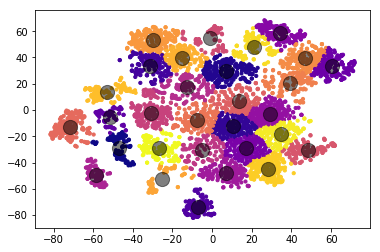

In [46]:
plt.scatter(descriptors_embd[:, 0], descriptors_embd[:, 1], c=y_kmeans, s=10, cmap='plasma')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)